In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from collections import Counter

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import matthews_corrcoef, make_scorer, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
import xgboost as xg
from catboost import CatBoostClassifier
warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

# check version number
from imblearn.over_sampling import SMOTE
# print(imblearn.__version__)

In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [11]:
datat = pd.read_csv('test.csv', index_col=0)
datat.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,Male,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95
1,Female,0,Yes,Yes,26,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.8
2,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1
3,Male,0,No,No,12,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3
4,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05


In [105]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service':2},
                     'Internet' : {'DSL':1, 'Fiber optic':0,'No':2},
                     'Security' : {'Yes': 1, 'No': 0,'No internet service':1},
                     'Backup': {'Yes': 1, 'No': 0,'No internet service':1},
                     'Insurance' : {'Yes': 1, 'No': 0,'No internet service':1},
                     'Support' : {'Yes': 1, 'No': 0,'No internet service':1},
                     'TV' : {'Yes': 0, 'No': 0,'No internet service':2},
                     'Movies' : {'Yes': 0, 'No': 0,'No internet service':2},
                     'Contract' : {'Month-to-month': 2, 'One year': 0,'Two year':0},
                     'PaymentMethod' : {'Electronic check': 3, 'Mailed check': 0,'Bank transfer (automatic)':0,'Credit card (automatic)':0}
                    })
numeric_data = data.select_dtypes(include=np.number)
numeric_data.head(4)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,2,1,1,1,1,1,0,0,0,0,0,54.20,3623.95
1,1,0,0,0,34,1,1,1,1,1,0,1,0,0,0,1,0,64.40,2088.75
2,1,1,1,0,72,1,1,0,1,1,1,1,0,0,0,1,0,96.60,6827.50
3,1,0,1,1,63,1,0,1,1,1,1,1,0,0,0,0,0,63.55,4014.20


In [3]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service':2},
                     'Internet' : {'DSL':1, 'Fiber optic':0,'No':2},
                     'Security' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Backup': {'Yes': 1, 'No': 0,'No internet service':2},
                     'Insurance' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Support' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'TV' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Movies' : {'Yes': 0, 'No': 1,'No internet service':2},
                     'Contract' : {'Month-to-month': 2, 'One year': 1,'Two year':0},
                     'PaymentMethod' : {'Electronic check': 3, 'Mailed check': 2,'Bank transfer (automatic)':0,'Credit card (automatic)':1}
                    })
numeric_data = data.select_dtypes(include=np.number)
numeric_data.head(4)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,2,1,1,1,1,1,1,1,0,0,1,54.20,3623.95
1,1,0,0,0,34,1,1,1,1,1,0,1,0,1,1,1,2,64.40,2088.75
2,1,1,1,0,72,1,1,0,1,1,1,1,0,1,0,1,0,96.60,6827.50
3,1,0,1,1,63,1,0,1,1,1,1,1,0,1,0,0,2,63.55,4014.20


In [10]:
datat.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
datat = datat.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service':2},
                     'Internet' : {'DSL':1, 'Fiber optic':0,'No':2},
                     'Security' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Backup': {'Yes': 1, 'No': 0,'No internet service':2},
                     'Insurance' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Support' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'TV' : {'Yes': 1, 'No': 0,'No internet service':2},
                     'Movies' : {'Yes': 0, 'No': 1,'No internet service':2},
                     'Contract' : {'Month-to-month': 2, 'One year': 1,'Two year':0},
                     'PaymentMethod' : {'Electronic check': 3, 'Mailed check': 2,'Bank transfer (automatic)':0,'Credit card (automatic)':1}
                    })
numeric_data = datat.select_dtypes(include=np.number)
numeric_data.head(4)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,58,1,0,0,1,1,0,0,1,0,1,0,0,99.15,3623.95
1,1,0,1,1,26,1,0,0,0,0,0,0,1,0,2,1,3,90.80,2088.75
2,1,0,0,0,26,1,0,0,1,0,1,1,0,1,1,1,1,87.15,6827.50
3,0,0,0,0,12,1,1,1,1,1,0,1,0,1,2,1,3,67.25,4014.20


In [23]:
print(Counter(data.values[:,1]))

Counter({0: 3029, 1: 562})


In [4]:
data[data['Churn']==True]['Contract'].value_counts()

2    848
1     83
0     21
Name: Contract, dtype: int64

(<AxesSubplot:title={'center':'<Security> Churn=False'}>,
 <AxesSubplot:title={'center':'<Security> Churn=False'}>)

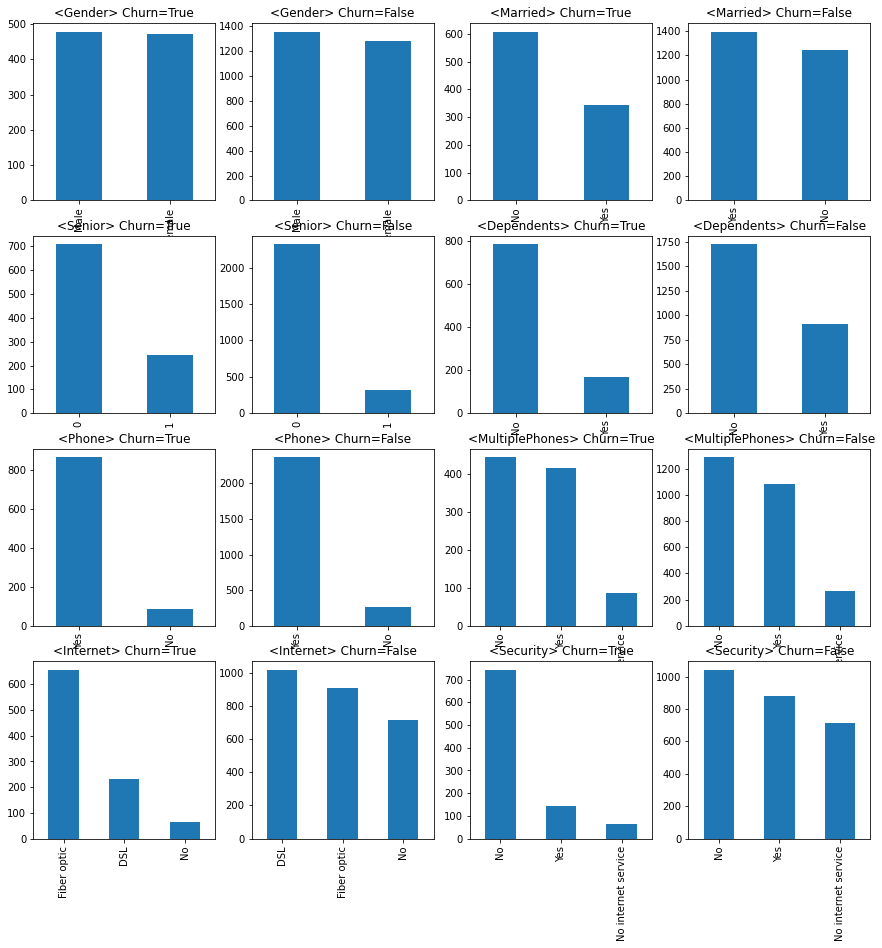

In [7]:
mat = 16
plt.figure(figsize=(15,15))
plt.subplot(np.sqrt(mat),np.sqrt(mat),1), data[data['Churn']==True]['Gender'].value_counts().plot(kind='bar',title='<Gender> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),2), data[data['Churn']==False]['Gender'].value_counts().plot(kind='bar',title='<Gender> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),3), data[data['Churn']==True]['Married'].value_counts().plot(kind='bar',title='<Married> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),4), data[data['Churn']==False]['Married'].value_counts().plot(kind='bar',title='<Married> Churn=False')
plt.subplot(np.sqrt(mat),np.sqrt(mat),5), data[data['Churn']==True]['Senior'].value_counts().plot(kind='bar',title='<Senior> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),6), data[data['Churn']==False]['Senior'].value_counts().plot(kind='bar',title='<Senior> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),7), data[data['Churn']==True]['Dependents'].value_counts().plot(kind='bar',title='<Dependents> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),8), data[data['Churn']==False]['Dependents'].value_counts().plot(kind='bar',title='<Dependents> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),9), data[data['Churn']==True]['Phone'].value_counts().plot(kind='bar',title='<Phone> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),10), data[data['Churn']==False]['Phone'].value_counts().plot(kind='bar',title='<Phone> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),11), data[data['Churn']==True]['MultiplePhones'].value_counts().plot(kind='bar',title='<MultiplePhones> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),12), data[data['Churn']==False]['MultiplePhones'].value_counts().plot(kind='bar',title='<MultiplePhones> Churn=False')
plt.subplot(np.sqrt(mat),np.sqrt(mat),13), data[data['Churn']==True]['Internet'].value_counts().plot(kind='bar',title='<Internet> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),14), data[data['Churn']==False]['Internet'].value_counts().plot(kind='bar',title='<Internet> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),15), data[data['Churn']==True]['Security'].value_counts().plot(kind='bar',title='<Security> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),16), data[data['Churn']==False]['Security'].value_counts().plot(kind='bar',title='<Security> Churn=False') 

In [55]:
print('Married 1')
print(np.max(Counter(data[data['Churn']==True]['Married']==1))/np.max(Counter(data['Married']==1)))
print(np.max(Counter(data[data['Churn']==False]['Married']==1))/np.max(Counter(data['Married']==1)))
print('Married 0')
print(np.max(Counter(data[data['Churn']==True]['Married']==0))/np.max(Counter(data['Married']==0)))
print(np.max(Counter(data[data['Churn']==False]['Married']==0))/np.max(Counter(data['Married']==0)))
# Counter(data['Married']==1)[0]

Married 1


TypeError: unsupported operand type(s) for /: 'Counter' and 'Counter'

In [66]:
Counter(data[data['Churn']==True]['Married']==1)

344

(<AxesSubplot:title={'center':'<PaymentMethod> Churn=False'}>,
 <AxesSubplot:title={'center':'<PaymentMethod> Churn=False'}>)

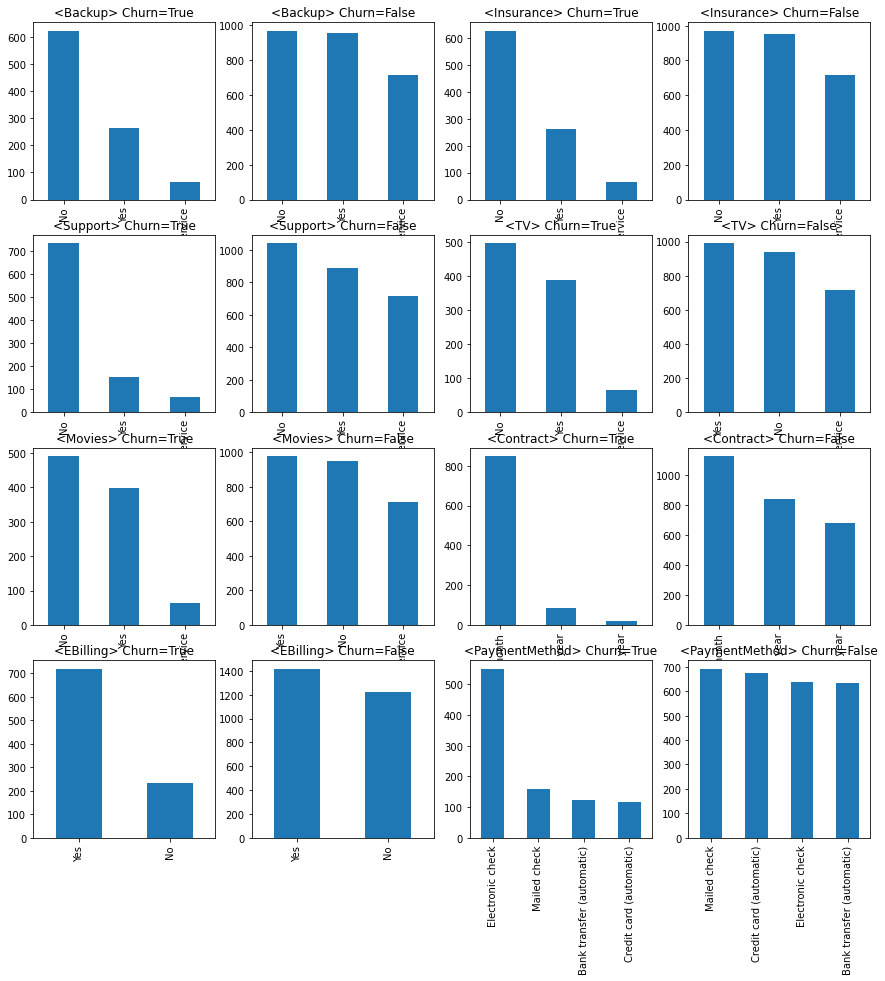

In [8]:
mat = 16
plt.figure(figsize=(15,15))
plt.subplot(np.sqrt(mat),np.sqrt(mat),1), data[data['Churn']==True]['Backup'].value_counts().plot(kind='bar',title='<Backup> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),2), data[data['Churn']==False]['Backup'].value_counts().plot(kind='bar',title='<Backup> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),3), data[data['Churn']==True]['Insurance'].value_counts().plot(kind='bar',title='<Insurance> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),4), data[data['Churn']==False]['Insurance'].value_counts().plot(kind='bar',title='<Insurance> Churn=False')
plt.subplot(np.sqrt(mat),np.sqrt(mat),5), data[data['Churn']==True]['Support'].value_counts().plot(kind='bar',title='<Support> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),6), data[data['Churn']==False]['Support'].value_counts().plot(kind='bar',title='<Support> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),7), data[data['Churn']==True]['TV'].value_counts().plot(kind='bar',title='<TV> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),8), data[data['Churn']==False]['TV'].value_counts().plot(kind='bar',title='<TV> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),9), data[data['Churn']==True]['Movies'].value_counts().plot(kind='bar',title='<Movies> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),10), data[data['Churn']==False]['Movies'].value_counts().plot(kind='bar',title='<Movies> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),11), data[data['Churn']==True]['Contract'].value_counts().plot(kind='bar',title='<Contract> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),12), data[data['Churn']==False]['Contract'].value_counts().plot(kind='bar',title='<Contract> Churn=False')
plt.subplot(np.sqrt(mat),np.sqrt(mat),13), data[data['Churn']==True]['EBilling'].value_counts().plot(kind='bar',title='<EBilling> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),14), data[data['Churn']==False]['EBilling'].value_counts().plot(kind='bar',title='<EBilling> Churn=False') 
plt.subplot(np.sqrt(mat),np.sqrt(mat),15), data[data['Churn']==True]['PaymentMethod'].value_counts().plot(kind='bar',title='<PaymentMethod> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),16), data[data['Churn']==False]['PaymentMethod'].value_counts().plot(kind='bar',title='<PaymentMethod> Churn=False') 

(<AxesSubplot:title={'center':'<PaymentMethod> Churn=True'}>,
 <AxesSubplot:title={'center':'<PaymentMethod> Churn=True'}>)

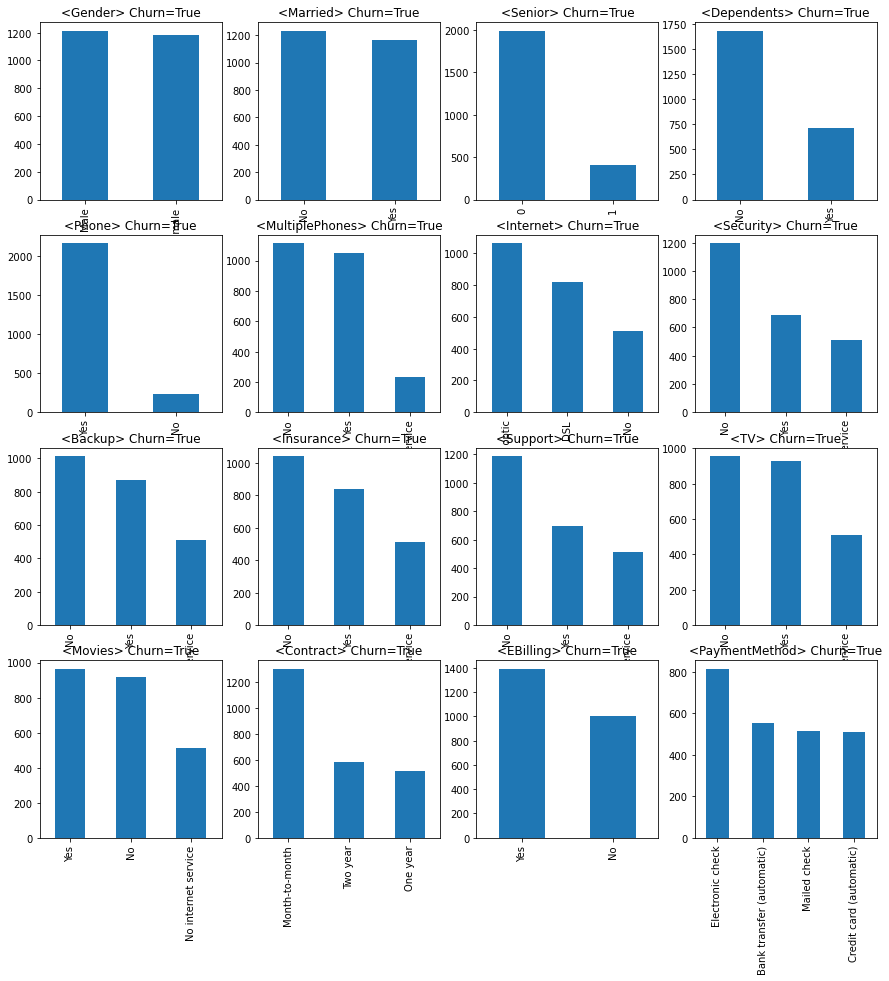

In [12]:
mat = 16
plt.figure(figsize=(15,15))
plt.subplot(np.sqrt(mat),np.sqrt(mat),1), datat['Gender'].value_counts().plot(kind='bar',title='<Gender> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),2), datat['Married'].value_counts().plot(kind='bar',title='<Married> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),3), datat['Senior'].value_counts().plot(kind='bar',title='<Senior> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),4), datat['Dependents'].value_counts().plot(kind='bar',title='<Dependents> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),5), datat['Phone'].value_counts().plot(kind='bar',title='<Phone> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),6), datat['MultiplePhones'].value_counts().plot(kind='bar',title='<MultiplePhones> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),7), datat['Internet'].value_counts().plot(kind='bar',title='<Internet> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),8), datat['Security'].value_counts().plot(kind='bar',title='<Security> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),9), datat['Backup'].value_counts().plot(kind='bar',title='<Backup> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),10), datat['Insurance'].value_counts().plot(kind='bar',title='<Insurance> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),11), datat['Support'].value_counts().plot(kind='bar',title='<Support> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),12), datat['TV'].value_counts().plot(kind='bar',title='<TV> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),13), datat['Movies'].value_counts().plot(kind='bar',title='<Movies> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),14), datat['Contract'].value_counts().plot(kind='bar',title='<Contract> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),15), datat['EBilling'].value_counts().plot(kind='bar',title='<EBilling> Churn=True')
plt.subplot(np.sqrt(mat),np.sqrt(mat),16), datat['PaymentMethod'].value_counts().plot(kind='bar',title='<PaymentMethod> Churn=True')


In [5]:
data['pers'] = 0
data['pers']=data['pers'].astype(float)

In [6]:
ds = data.values
print(ds.shape)
for i in range(ds.shape[0]):
    sum = 0
    if data['Internet'][i]==2:
        sum+=0.1
    else:
        sum-=0.1
    if data['Security'][i]==2:
        sum+=0.05
    else:
        sum-=0.1
    if data['Backup'][i]==2:
        sum+=0.05
    else:
        sum-=0.1
    if data['TV'][i]==2:
        sum+=0.05
    else:
        sum-=0.1
    if data['Movies'][i]==2:
        sum+=0.05
    else:
        sum-=0.1
    if data['Insurance'][i]==2:
        sum+=0.05
    else:
        sum-=0.1
    if data['EBilling'][i]==0:
        sum+=0.025
    else:
        sum-=0.1
    if data['Support'][i]==1:
        sum+=0.1
    else:
        sum-=0.1
    if data['Senior'][i]==0:
        sum+=0.025
    if data['Contract'][i]==1 or data['Contract'][i]==0:
        sum+=0.3
    data['pers'][i] = -sum
   

(3591, 21)
-0.14999999999999997
-0.27499999999999997
-0.3
-0.14999999999999997
-0.3499999999999999
-0.575
-0.4749999999999999
-0.6499999999999999
-0.7999999999999999
-0.4749999999999999
-0.14999999999999997
-0.575
-0.27499999999999997
-0.575
-0.7749999999999999
-0.7999999999999999
-0.14999999999999997
-0.49999999999999994
-0.3
-0.44999999999999996
-0.575
0.475
-0.7999999999999999
-0.6499999999999999
0.6000000000000001
-0.175
-0.49999999999999994
-0.6499999999999999
-0.4749999999999999
-0.6499999999999999


,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,pers
Index,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,2,1,1,1,...,1,1,1,0,0,1,54.20,3623.95,False,0.150
1,1,0,0,0,34,1,1,1,1,1,...,1,0,1,1,1,2,64.40,2088.75,True,0.275
2,1,1,1,0,72,1,1,0,1,1,...,1,0,1,0,1,0,96.60,6827.50,False,0.300
3,1,0,1,1,63,1,0,1,1,1,...,1,0,1,0,0,2,63.55,4014.20,False,0.150
4,0,0,1,1,69,1,1,0,0,1,...,0,1,1,1,0,1,95.75,6511.25,False,0.350
5,1,0,1,1,3,1,0,0,0,1,...,1,0,1,2,1,3,80.00,241.30,False,0.575
6,1,0,1,1,68,1,1,1,1,1,...,0,1,1,1,1,1,73.00,5163.00,False,0.475
7,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,0,2,44.65,74.90,True,0.650
8,1,1,1,0,19,1,1,0,0,0,...,0,1,0,2,1,3,94.95,1760.25,False,0.800


In [7]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.head(4)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,pers
Index,,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,2,1,1,1,1,1,1,1,0,0,1,54.20,3623.95,0.150
1,1,0,0,0,34,1,1,1,1,1,0,1,0,1,1,1,2,64.40,2088.75,0.275
2,1,1,1,0,72,1,1,0,1,1,1,1,0,1,0,1,0,96.60,6827.50,0.300
3,1,0,1,1,63,1,0,1,1,1,1,1,0,1,0,0,2,63.55,4014.20,0.150


<AxesSubplot:>

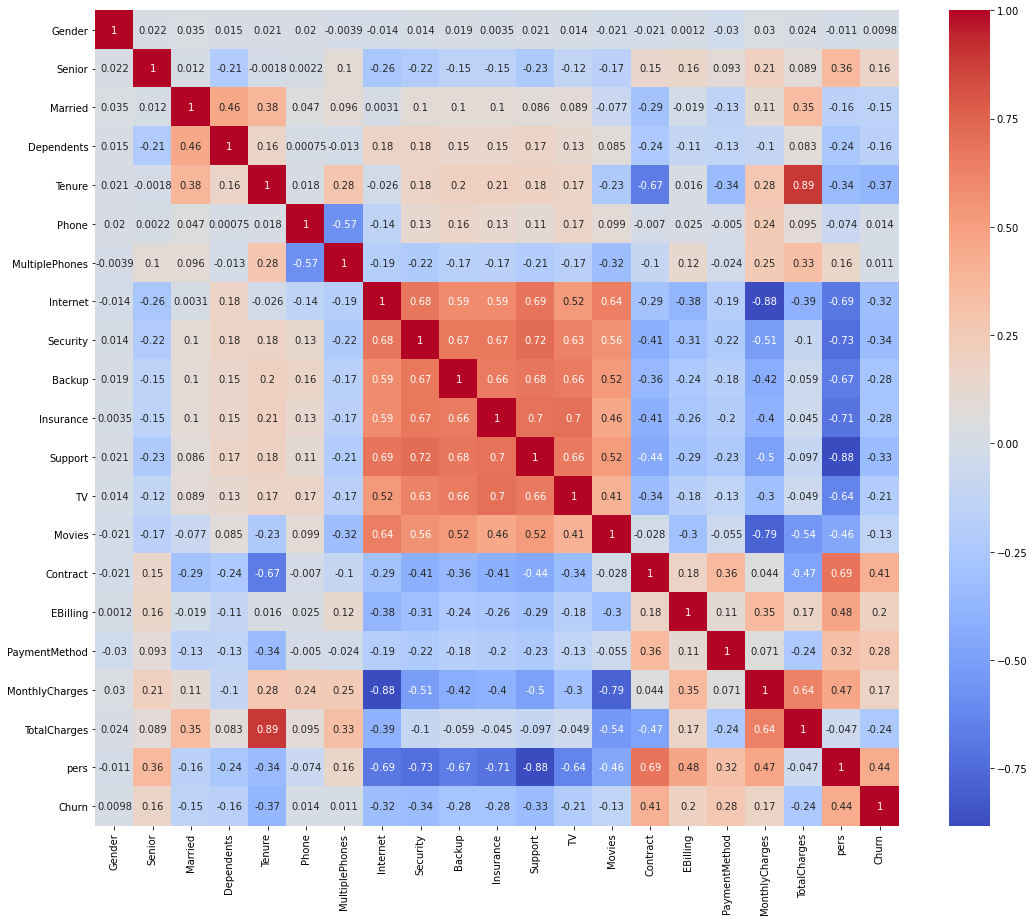

In [8]:
plt.figure(figsize=(18,15))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)